<a href="https://colab.research.google.com/github/wolego2uni/ibm_demo/blob/main/5_1_Statistics_2_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.shape

(6497, 13)

Actual Mean: 10.491801
Sample Mean: 10.492182
Sample Error: -0.000381


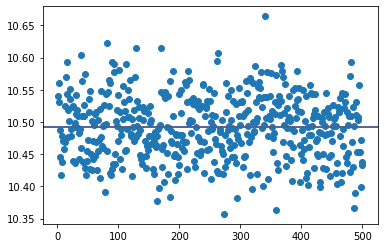

In [4]:
import pandas as pd

sample_means = []
population_mean = df['alcohol'].mean()
sample_size = 500

for i in range(sample_size):
    # we use the sample function to take n samples, random state is a seed parameter to generate pseudo randomn numbers
    sample = df['alcohol'].sample(sample_size, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,sample_size+1), sample_means)

# Plots our actual mean
plt.axhline(population_mean, color='red')

# Plots the mean of our sample size
sample_size_mean = np.array(sample_means).mean()
plt.axhline(sample_size_mean)

print("Actual Mean: %2f" % (population_mean))
print("Sample Mean: %2f" % (sample_size_mean))
print("Sample Error: %2f" % (population_mean-sample_size_mean))

# Stratifying Sampling

Taking the average alcohol content of wines based on our sample can be misleading because our dataset contains both red and white wines, and when looking at the proportion, it contains far more white wines.

In [5]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [6]:
# We need to stratify the data

stratum_white = df[df.type == 'white']
stratum_red = df[df.type == 'red']

In [7]:
len(stratum_white)

4898

In [8]:
alcohol_per_wine_type = {}

for stratum, wine_type in [(stratum_white, 'white'), (stratum_red, 'red')]:
  sample = stratum['alcohol'].sample(250, random_state = 0) # random sampling on each stratum
  alcohol_per_wine_type[wine_type] = sample.mean()

print(alcohol_per_wine_type)

{'white': 10.610040000011999, 'red': 10.47900000000001}
